# Example use of dclut

In [1]:
import numpy as np
from tqdm import tqdm
import xarray as xr
import matplotlib.pyplot as plt
from dclut import dclut, create_dclut

In [2]:
bin_path = "D:\\SortingTemp\\24-05-31_DH23_A1-IC_g0\\24-05-31_DH23_A1-IC_g0_imec0\\24-05-31_DH23_A1-IC_g0_t0.imec0.ap.bin"

In [3]:
from mimo_pack.fileio.spikeglx import read_meta, get_geommap, get_chanmap
gmap = get_geommap(bin_path)
chmap = get_chanmap(bin_path)
meta = read_meta(bin_path)

chan_props = chmap.merge(gmap, left_index=True, right_index=True, how='outer')
chan_props

,name,order,shank,x,y,used
0,AP0;0,242,2.0,527.0,3600.0,1.0
1,AP1;1,243,2.0,559.0,3600.0,1.0
2,AP2;2,244,2.0,527.0,3615.0,1.0
3,AP3;3,245,2.0,559.0,3615.0,1.0
4,AP4;4,246,2.0,527.0,3630.0,1.0
...,...,...,...,...,...,...
380,AP380;380,334,3.0,777.0,3570.0,1.0
381,AP381;381,335,3.0,809.0,3570.0,1.0
382,AP382;382,336,3.0,777.0,3585.0,1.0
383,AP383;383,337,3.0,809.0,3585.0,1.0


In [4]:
chan_num = meta['nSavedChans']
t_num = meta['fileSizeBytes'] // (2 * chan_num)

scale_names = ['time', 'channel', 'ch_name', 'ch_order', 'ch_x', 'ch_y', 'ch_shank']
scale_dims = [0, 1, 1, 1, 1, 1, 1]
scale_units = ['seconds', 'none', 'none', 'none', 'um', 'um', 'none']
scale_types = ['linear', 'index', 'list', 'list', 'list', 'list', 'list']
scale_vals = [[1/meta['imSampRate'], 0], None, chan_props['name'].values, 
              chan_props['order'].values, chan_props['x'].values, 
              chan_props['y'].values, chan_props['shank'].values]


In [5]:
dcl_path = create_dclut(bin_path, [t_num, chan_num], dtype='int16', data_name='data',
                        data_unit='au', scale_names = scale_names, scale_dims = scale_dims,
                        scale_units = scale_units, scale_types = scale_types, scale_vals = scale_vals)

In [6]:
# create dclut object, view properties
dcl_obj = dclut(dcl_path)
print(dcl_obj)

File: 24-05-31_DH23_A1-IC_g0_t0.imec0.ap.bin
Type: binary
Shape: [810401990, 385]
----------------

Data: data (au)
Type: int16
Scales:

  time (seconds)
  ----
  dimension: 0
  type: linear
  min: 0.0
  max: 27013.399633333334

  channel (none)
  -------
  dimension: 1
  type: index
  values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173

In [7]:
# simple selection
dcl_obj.points({'channel': [0]})
dcl_obj.intervals({'time': [0, 1]})
data = dcl_obj.read()
print(data)

100%|██████████| 1/1 [00:00<00:00, 35.34it/s]

[array([[219],
       [222],
       [220],
       ...,
       [138],
       [137],
       [135]], dtype=int16)]


In [8]:
# implicit selection of unspecified dimension
dcl_obj.reset()
dcl_obj.intervals({'time': [0, 1]})
data = dcl_obj.read()
print(data)

100%|██████████| 1/1 [00:00<00:00, 10.31it/s]

[array([[219, 272, 209, ..., 307, 273,  64],
       [222, 264, 210, ..., 309, 280,  64],
       [220, 264, 210, ..., 311, 276,  64],
       ...,
       [138, 182, 128, ..., 245, 215,  64],
       [137, 189, 126, ..., 251, 222,  64],
       [135, 187, 124, ..., 253, 227,  64]], dtype=int16)]


In [9]:
# fluent syntax is also supported, although it is generally considered 'un-pythonic'
data = dcl_obj.reset().intervals({'time': [0, 1]}).read()
print(data)

100%|██████████| 1/1 [00:00<00:00, 14.58it/s]

[array([[219, 272, 209, ..., 307, 273,  64],
       [222, 264, 210, ..., 309, 280,  64],
       [220, 264, 210, ..., 311, 276,  64],
       ...,
       [138, 182, 128, ..., 245, 215,  64],
       [137, 189, 126, ..., 251, 222,  64],
       [135, 187, 124, ..., 253, 227,  64]], dtype=int16)]


In [10]:
data = dcl_obj.read(format='xarray')
print(data)

100%|██████████| 1/1 [00:00<00:00, 16.15it/s]

[<xarray.DataArray (time: 30000, channel: 385)> Size: 23MB
array([[219, 272, 209, ..., 307, 273,  64],
       [222, 264, 210, ..., 309, 280,  64],
       [220, 264, 210, ..., 311, 276,  64],
       ...,
       [138, 182, 128, ..., 245, 215,  64],
       [137, 189, 126, ..., 251, 222,  64],
       [135, 187, 124, ..., 253, 227,  64]], dtype=int16)
Coordinates:
  * time      (time) float64 240kB 0.0 3.333e-05 6.667e-05 ... 0.9999 0.9999 1.0
  * channel   (channel) int32 2kB 0 1 2 3 4 5 6 ... 378 379 380 381 382 383 384
    ch_name   (channel) <U9 14kB 'AP0;0' 'AP1;1' ... 'AP383;383' 'SY0;384'
    ch_order  (channel) int32 2kB 242 243 244 245 246 ... 334 335 336 337 384
    ch_x      (channel) float64 3kB 527.0 559.0 527.0 559.0 ... 777.0 809.0 nan
    ch_y      (channel) float64 3kB 3.6e+03 3.6e+03 3.615e+03 ... 3.585e+03 nan
    ch_shank  (channel) float64 3kB 2.0 2.0 2.0 2.0 2.0 ... 3.0 3.0 3.0 3.0 nan
    s0        (time) int64 240kB 0 1 2 3 4 5 ... 29995 29996 29997 29998 29999
    s

In [8]:
dcl_obj.reset()
dcl_obj.points({'ch_x': [527, 700], 'ch_y': [3600, 4000]}).intervals({'time': [[0, 1], [0.5, 3]]}) 
test2 = dcl_obj.read(mode='split', format='xarray')
test2

[<xarray.DataArray (time: 30000, channel: 1)> Size: 60kB
 array([[219],
        [222],
        [220],
        ...,
        [138],
        [137],
        [135]], dtype=int16)
 Coordinates:
   * time      (time) float64 240kB 0.0 3.333e-05 6.667e-05 ... 0.9999 0.9999 1.0
   * channel   (channel) int64 8B 0
     ch_name   (channel) <U9 36B 'AP0;0'
     ch_order  (channel) int32 4B 242
     ch_x      (channel) float64 8B 527.0
     ch_y      (channel) float64 8B 3.6e+03
     ch_shank  (channel) float64 8B 2.0
     s0        (time) int64 240kB 0 1 2 3 4 5 ... 29995 29996 29997 29998 29999
     s1        (channel) int64 8B 0,
 <xarray.DataArray (time: 75000, channel: 1)> Size: 150kB
 array([[190],
        [190],
        [199],
        ...,
        [264],
        [268],
        [266]], dtype=int16)
 Coordinates:
   * time      (time) float64 600kB 0.5 0.5 0.5001 0.5001 ... 3.0 3.0 3.0 3.0
   * channel   (channel) int64 8B 92
     ch_name   (channel) <U9 36B 'AP92;92'
     ch_order  (channel) 

In [9]:
dcl_obj.reset()
dcl_obj.points({'ch_x': [527], 'ch_y': [3600]}).intervals({'time': [[0, 1], [0.5, 3], [10, 12]]})
test3 = dcl_obj.read(mode='split', format='xarray')
test3

[<xarray.DataArray (time: 30000, channel: 1)> Size: 60kB
 array([[219],
        [222],
        [220],
        ...,
        [138],
        [137],
        [135]], dtype=int16)
 Coordinates:
   * time      (time) float64 240kB 0.0 3.333e-05 6.667e-05 ... 0.9999 0.9999 1.0
   * channel   (channel) int64 8B 0
     ch_name   (channel) <U9 36B 'AP0;0'
     ch_order  (channel) int32 4B 242
     ch_x      (channel) float64 8B 527.0
     ch_y      (channel) float64 8B 3.6e+03
     ch_shank  (channel) float64 8B 2.0
     s0        (time) int64 240kB 0 1 2 3 4 5 ... 29995 29996 29997 29998 29999
     s1        (channel) int64 8B 0,
 <xarray.DataArray (time: 75000, channel: 1)> Size: 150kB
 array([[184],
        [182],
        [171],
        ...,
        [232],
        [234],
        [232]], dtype=int16)
 Coordinates:
   * time      (time) float64 600kB 0.5 0.5 0.5001 0.5001 ... 3.0 3.0 3.0 3.0
   * channel   (channel) int64 8B 0
     ch_name   (channel) <U9 36B 'AP0;0'
     ch_order  (channel) int

In [20]:
dcl_obj.reset()
dcl_obj.points({'ch_x': [27.0]}).intervals({'time': [0, 1]})
test2 = dcl_obj.read(format='xarray')
test2

> c:\users\dbh60\documents\dclut\dclut\core.py(269)points()
    267                 idxs.append(self._find_index(scales, values, mode=mode))
    268             import pdb; pdb.set_trace()
--> 269             self._selection[dim][-1] = np.concatenate(idxs)
    270 
    271         return self



<xarray.DataArray (time: 30000, channel: 48)> Size: 3MB
array([[252, 159, 244, ..., 234, 178, 270],
       [257, 159, 241, ..., 243, 187, 270],
       [246, 150, 235, ..., 225, 174, 272],
       ...,
       [180,  96, 180, ..., 189, 134, 230],
       [180,  94, 178, ..., 182, 131, 225],
       [175,  96, 182, ..., 197, 140, 231]], dtype=int16)
Coordinates:
  * time      (time) float64 240kB 0.0 3.333e-05 6.667e-05 ... 0.9999 0.9999 1.0
  * channel   (channel) int64 384B 46 96 98 100 102 104 ... 228 230 232 234 236
    ch_name   (channel) <U9 2kB 'AP46;46' 'AP96;96' ... 'AP234;234' 'AP236;236'
    ch_order  (channel) int32 192B 0 2 4 6 8 10 12 14 ... 82 84 86 88 90 92 94
    ch_x      (channel) float64 384B 27.0 27.0 27.0 27.0 ... 27.0 27.0 27.0 27.0
    ch_y      (channel) float64 384B 3.225e+03 3.24e+03 ... 3.915e+03 3.93e+03
    ch_shank  (channel) float64 384B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    s0        (time) int64 240kB 0 1 2 3 4 5 ... 29995 29996 29997 29998 29999
    s1        (channel) int64 384B 46 96 98 100 102 104 ... 228 230 232 234 236

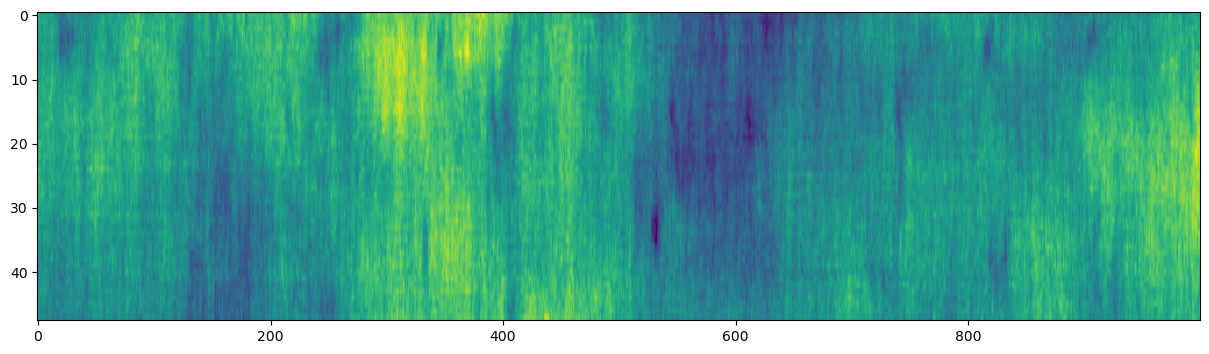

In [21]:
fig, ax = plt.subplots(figsize=(15,4))
data_snip = test2.sortby('ch_y').data[:1000,:]
plt.imshow((data_snip-np.mean(data_snip,axis=0)).T, aspect='auto')

In [26]:
dcl_obj2 = dclut(dcl_path2)

max_sec = dcl_obj2.scale_values('time')[-1]

sync2 = []
min_edges = np.append(np.arange(0, max_sec, 60), max_sec)

for i in tqdm(range(len(min_edges)-1)):
    dcl_obj2.reset()
    dcl_obj2.intervals({'time': min_edges[[i,i+1]]})
    dcl_obj2.points({'channel': 384})
    sync2.append(dcl_obj2.read(format='xarray'))

full_sync2 = xr.concat(sync2, dim='time')

100%|██████████| 451/451 [31:07<00:00,  4.14s/it]
